In [3]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv('OnlineNewsPopularity.csv')

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (51) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [5]:
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.1,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593.0
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711.0
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.1,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500.0
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200.0
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505.0


In [6]:
df.columns

Index(['url', ' timedelta', ' n_tokens_title', ' n_tokens_content',
       ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens',
       ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos',
       ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sent

In [7]:
dict = {' weekday_is_monday': 'Monday',
        ' weekday_is_tuesday': 'Tuesday',
        ' weekday_is_wednesday': 'Wednesday',
        ' weekday_is_thursday': 'Thursday',
        ' weekday_is_friday': 'Friday',
        ' weekday_is_saturday': "Saturday",
        ' weekday_is_sunday': 'Sunday'}
 
# call rename () method
df.rename(columns=dict,
          inplace=True)


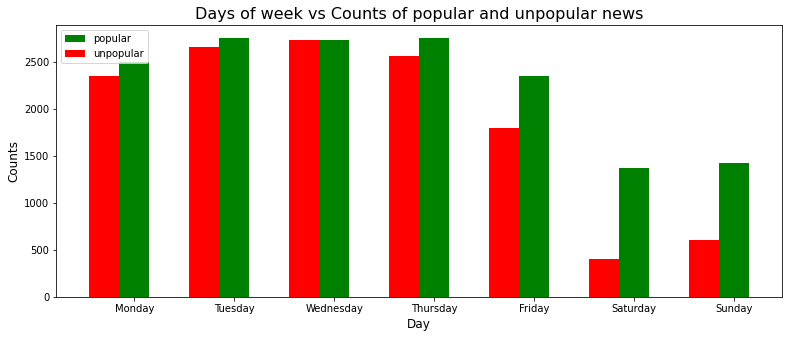

In [8]:
# Visualize the feature of different day of week
columns_day = df.columns.values[31:38]
unpop=df[df[' shares']<1400]
pop=df[df[' shares']>=1400]
unpop_day = unpop[columns_day].sum().values
pop_day = pop[columns_day].sum().values

import matplotlib.pyplot as pl
from IPython import get_ipython
get_ipython().run_line_magic('matplotlib', 'inline')

fig = pl.figure(figsize = (13,5))
pl.title("Days of week vs Counts of popular and unpopular news", fontsize = 16)
pl.bar(np.arange(len(columns_day)), pop_day, width = 0.3, align="center", color = 'g', \
          label = "popular")
pl.bar(np.arange(len(columns_day)) - 0.3, unpop_day, width = 0.3, align = "center", color = 'r', \
          label = "unpopular")
pl.xticks(np.arange(len(columns_day)), columns_day)
pl.ylabel("Counts", fontsize = 12)
pl.xlabel("Day", fontsize = 12)
    
pl.legend(loc = 'upper left')
pl.show()  

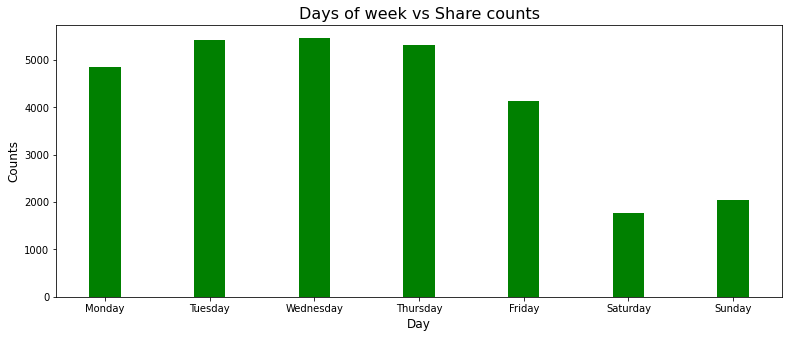

In [9]:
# Visualize the feature of different day of week
columns_day = df.columns.values[31:38]
shares = df[columns_day].sum().values

import matplotlib.pyplot as pl
from IPython import get_ipython
get_ipython().run_line_magic('matplotlib', 'inline')

fig = pl.figure(figsize = (13,5))
pl.title("Days of week vs Share counts", fontsize = 16)
pl.bar(np.arange(len(columns_day)), shares, width = 0.3, align="center", color = 'g')
pl.xticks(np.arange(len(columns_day)), columns_day)
pl.ylabel("Counts", fontsize = 12)
pl.xlabel("Day", fontsize = 12)
    
pl.show()  

In [10]:
dict = {' data_channel_is_lifestyle': 'Lifestyle',
        ' data_channel_is_entertainment': 'Entertainment',
        ' data_channel_is_bus': 'Business',
        ' data_channel_is_socmed': 'Social Media',
        ' data_channel_is_tech': 'Tech',
        ' data_channel_is_world': "World"}
 
df.rename(columns=dict,
          inplace=True)

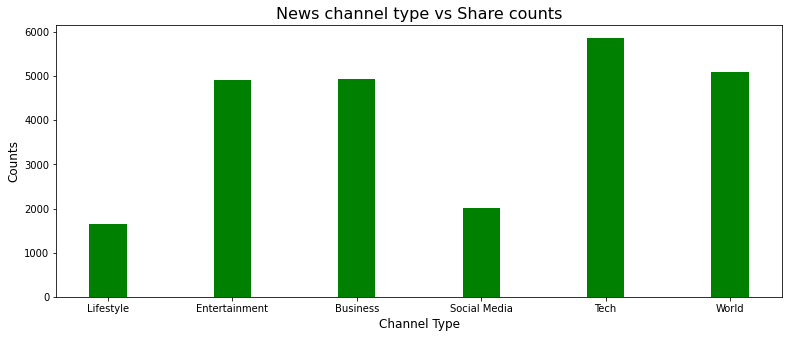

In [11]:
# Visualize the feature of news channel type
columns_day = df.columns.values[13:19]
shares = df[columns_day].sum().values

import matplotlib.pyplot as pl
from IPython import get_ipython
get_ipython().run_line_magic('matplotlib', 'inline')

fig = pl.figure(figsize = (13,5))
pl.title("News channel type vs Share counts", fontsize = 16)
pl.bar(np.arange(len(columns_day)), shares, width = 0.3, align="center", color = 'g')
pl.xticks(np.arange(len(columns_day)), columns_day)
pl.ylabel("Counts", fontsize = 12)
pl.xlabel("Channel Type", fontsize = 12)
    
pl.show()  

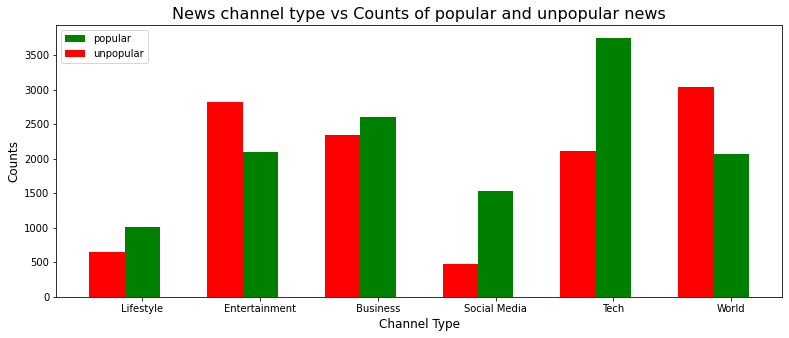

In [13]:
# Visualize the feature of different day of week
columns_day = df.columns.values[13:19]
unpop=df[df[' shares']<1400]
pop=df[df[' shares']>=1400]
unpop_day = unpop[columns_day].sum().values
pop_day = pop[columns_day].sum().values

import matplotlib.pyplot as pl
from IPython import get_ipython
get_ipython().run_line_magic('matplotlib', 'inline')

fig = pl.figure(figsize = (13,5))
pl.title("News channel type vs Counts of popular and unpopular news", fontsize = 16)
pl.bar(np.arange(len(columns_day)), pop_day, width = 0.3, align="center", color = 'g', \
          label = "popular")
pl.bar(np.arange(len(columns_day)) - 0.3, unpop_day, width = 0.3, align = "center", color = 'r', \
          label = "unpopular")
pl.xticks(np.arange(len(columns_day)), columns_day)
pl.ylabel("Counts", fontsize = 12)
pl.xlabel("Channel Type", fontsize = 12)
    
pl.legend(loc = 'upper left')
pl.show()  